In [1]:
import plots
from analysis import Analysis
from matplotlib import pyplot as plt
import matplotlib 
import pandas as pd
import numpy as np
import analysis

font_path = '/Users/philipp/Library/Fonts/LinLibertine_R.otf'
matplotlib.rcParams.update({
    'font.family': 'Linux Libertine O',
    'mathtext.fontset': 'custom',
    'mathtext.it': 'Linux Libertine O:italic',
    'mathtext.rm': 'Linux Libertine O',
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
})

## Global Performance

In [9]:
df_results = plots.performance_table('measurements/global-performance/2024-04-27-mimir/',
                                     'measurements/runtime/baran-2024-04-24/',
                                     'measurements/runtime/2024-04-15-baranpp-new/',
                                     'measurements/global-performance/2023-12-01-garf-baseline/',
                                     'measurements/global-performance/2023-12-01-holoclean-baseline/',
                                     full_metrics=True
                                    )

Loaded Mimir Results. 0/63 measurements failed.
Loaded Mimir Results. 0/81 measurements failed.
Loaded Mimir Results. 0/120 measurements failed.


In [10]:
df_results

ensemble           Mimir                  Baran++                  Baran  \
                      f1 precision recall      f1 precision recall    f1   
normalized_dataset                                                         
beers               0.96      0.96   0.96    0.98      1.00   0.97  0.92   
flights             0.66      0.66   0.66    0.64      0.68   0.61  1.00   
food                0.52      0.53   0.52     NaN       NaN    NaN  0.85   
hospital            0.96      0.96   0.96    0.91      0.94   0.88  0.87   
rayyan              0.82      0.83   0.82    0.64      0.75   0.56  0.41   
tax                 0.63      0.63   0.62     NaN       NaN    NaN   NaN   
bridges 3%          0.89      0.90   0.87    0.84      0.88   0.80  0.78   
bridges 1%          1.00      1.00   1.00    1.00      1.00   1.00  0.86   
cars 3%             0.92      0.93   0.91    0.95      0.99   0.91  0.87   
cars 1%             0.97      0.97   0.96    0.98      1.00   0.97  0.90   
glass 1%            0.82      0.85   0.79    0.88      0.95   0.83  0.87   
glass 3%            0.69      0.73   0.65    0.65      0.79   0.55  0.65   
restaurant 3%       0.52      0.53   0.52    0.50      0.67   0.40  0.38   
restaurant 1%       0.63      0.64   0.62    0.65      0.84   0.53  0.53   
6                   0.98      0.98   0.98    0.92      0.92   0.92  0.10   
137                 0.92      0.92   0.92    0.87      0.87   0.87  0.65   
151                 1.00      1.00   1.00    0.91      0.91   0.91  0.62   
184                 1.00      1.00   1.00    1.00      1.00   1.00  1.00   
1481                1.00      1.00   1.00    1.00      1.00   1.00  1.00   
41027               0.82      0.82   0.82    0.74      0.80   0.70  0.67   
43572               0.90      0.90   0.90    0.88      1.00   0.78  0.30   

ensemble                            HoloClean                   Garf  \
                   precision recall        f1 precision recall    f1   
normalized_dataset                                                     
beers                   0.95   0.89      0.02      0.44   0.01  0.00   
flights                 1.00   1.00      0.38      0.59   0.28  0.01   
food                    0.90   0.82       NaN       NaN    NaN   NaN   
hospital                0.89   0.86       NaN       NaN    NaN  0.31   
rayyan                  0.53   0.34      0.00      0.00   0.00   NaN   
tax                      NaN    NaN       NaN       NaN    NaN   NaN   
bridges 3%              0.78   0.78      0.01      0.01   0.02  0.02   
bridges 1%              0.86   0.86      0.00      0.00   0.00  0.02   
cars 3%                 0.90   0.85      0.00      0.01   0.00  0.01   
cars 1%                 0.90   0.90      0.00      0.00   0.00  0.00   
glass 1%                0.87   0.87       NaN       NaN    NaN  0.00   
glass 3%                0.68   0.62       NaN       NaN    NaN  0.00   
restaurant 3%           0.57   0.29      0.00      0.00   0.00  0.00   
restaurant 1%           0.62   0.47      0.00      0.00   0.00  0.00   
6                       0.10   0.10       NaN       NaN    NaN  0.00   
137                     0.65   0.65       NaN       NaN    NaN  0.00   
151                     0.62   0.62      0.95      0.96   0.94  0.00   
184                     1.00   1.00      1.00      1.00   1.00  0.00   
1481                    1.00   1.00      1.00      1.00   1.00  0.00   
41027                   0.67   0.67      0.00      0.00   0.00  0.00   
43572                   0.37   0.26       NaN       NaN    NaN   NaN   

ensemble                             
                   precision recall  
normalized_dataset                   
beers                   0.21   0.00  
flights                 0.38   0.00  
food                     NaN    NaN  
hospital                0.38   0.26  
rayyan                   NaN    NaN  
tax                      NaN    NaN  
bridges 3%              0.01   0.02  
bridges 1%              0.01   0.05  
cars 3%                 0.23

In [4]:
#print(df_results.to_latex(float_format="{:.2f}".format))

In [5]:
df_results = plots.performance_table('measurements/global-performance/2024-04-27-mimir/',
                                     'measurements/runtime/baran-2024-04-24/',
                                     'measurements/runtime/2024-04-15-baranpp-new/',
                                     'measurements/global-performance/2023-12-01-garf-baseline/',
                                     'measurements/global-performance/2023-12-01-holoclean-baseline/',
                                     full_metrics=False
                                    )

Loaded Mimir Results. 0/63 measurements failed.
Loaded Mimir Results. 0/81 measurements failed.
Loaded Mimir Results. 0/120 measurements failed.


Compare Baran with Mimir

In [7]:
df_results.drop(['tax', 'food']).mean(axis=0).round(3).apply(lambda x: x*100)

ensemble
Mimir        86.6
Baran++      83.9
Baran        70.4
HoloClean    25.8
Garf          2.2
dtype: float64

In [8]:
df_results

ensemble,Mimir,Baran++,Baran,HoloClean,Garf
normalized_dataset,,,,,
beers,0.96,0.98,0.92,0.02,0.00
flights,0.66,0.64,1.00,0.38,0.01
food,0.52,NaN,0.85,NaN,NaN
hospital,0.96,0.91,0.87,NaN,0.31
rayyan,0.82,0.64,0.41,0.00,NaN
tax,0.63,NaN,NaN,NaN,NaN
bridges 3%,0.89,0.84,0.78,0.01,0.02
bridges 1%,1.00,1.00,0.86,0.00,0.02
cars 3%,0.92,0.95,0.87,0.00,0.01


In [9]:
df_results[df_results['Baran'] + 0.03 < df_results['Mimir']]

ensemble,Mimir,Baran++,Baran,HoloClean,Garf
normalized_dataset,,,,,
beers,0.96,0.98,0.92,0.02,0.00
hospital,0.96,0.91,0.87,NaN,0.31
rayyan,0.82,0.64,0.41,0.00,NaN
bridges 3%,0.89,0.84,0.78,0.01,0.02
bridges 1%,1.00,1.00,0.86,0.00,0.02
cars 3%,0.92,0.95,0.87,0.00,0.01
cars 1%,0.97,0.98,0.90,0.00,0.00
glass 3%,0.69,0.65,0.65,NaN,0.00
restaurant 3%,0.52,0.50,0.38,0.00,0.00


In [10]:
df_results[df_results['Baran'] > df_results['Mimir']]

ensemble,Mimir,Baran++,Baran,HoloClean,Garf
normalized_dataset,,,,,
flights,0.66,0.64,1.00,0.38,0.01
food,0.52,NaN,0.85,NaN,NaN
glass 1%,0.82,0.88,0.87,NaN,0.00


### Global Performance Boxplot

Mimir hat eine Messung auf `tax`, die auf Baran crasht.
Also sollte ich den Datensatz nicht reporten.

Danach haben beide Algorithmen die gleiche Anzahl an Messungen.

In [11]:
res_mimir, failed_measurements = plots.get_mimir_result('measurements/global-performance/2024-04-27-mimir/')
res_mimir = [{**r, 'ensemble': 'Mimir'} for r in res_mimir]

res_baran, failed_measurements = plots.get_mimir_result('measurements/runtime/baran-2024-04-24/')
res_baran = [{**r, 'ensemble': 'Baran'} for r in res_baran]

res_baranpp, failed_measurements = plots.get_mimir_result('measurements/runtime/2024-04-15-baranpp-new/')
res_baranpp = [{**r, 'ensemble': 'Baran++'} for r in res_baranpp]

Loaded Mimir Results. 0/63 measurements failed.
Loaded Mimir Results. 0/81 measurements failed.
Loaded Mimir Results. 0/120 measurements failed.


In [12]:
res_mimir_boxplots = [r for r in res_mimir if r['dataset'] != 'tax']
len([x for x in res_baran if x['dataset_group'] == 'Baran']) == len([x for x in res_mimir_boxplots if x['dataset_group'] == 'Baran'])

True

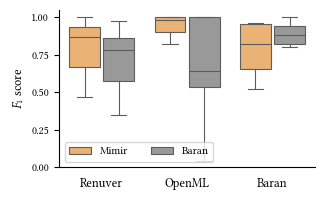

In [13]:
fig, ax, df = plots.plot_mimir_vs_baran(res_baran, res_mimir_boxplots)

In [14]:
df.loc[:, ['dataset_group', 'ensemble', 'F1 Score']].groupby(['ensemble', 'dataset_group']).agg({'F1 Score': ['mean', 'std']})

F1 Score          
                            mean       std
ensemble dataset_group                    
Baran    Baran          0.810728  0.229715
         OpenML         0.619927  0.325227
         Renuver        0.729424  0.189479
Mimir    Baran          0.784483  0.177173
         OpenML         0.945714  0.067570
         Renuver        0.804251  0.170931

In [15]:
df_ensemble = df.loc[:, ['ensemble', 'F1 Score']].groupby(['ensemble']).agg({'F1 Score': ['mean', 'std']})

In [16]:
mimir_f1 = df_ensemble['F1 Score'][df_ensemble['F1 Score'].index == 'Mimir']['mean'][0]
baran_f1 = df_ensemble['F1 Score'][df_ensemble['F1 Score'].index == 'Baran']['mean'][0]

imp = round((mimir_f1 - baran_f1)/baran_f1, 3) * 100

print(f'Mimir achieves an improvment of {imp}% relative to Baran in F1 correction score across all datasets.')
print(f'Mimir achieves an average correction F1-Score of {round(mimir_f1*100, 1)}%, Baran {round(baran_f1*100, 1)}%. Mimir is {round((mimir_f1 - baran_f1)*100, 1)}% better.')

Mimir achieves an improvment of 19.3% relative to Baran in F1 correction score across all datasets.
Mimir achieves an average correction F1-Score of 84.9%, Baran 71.1%. Mimir is 13.7% better.


Loaded Ablation Study. 0/567 measurements failed.
Loaded Ablation Study. 0/567 measurements failed.
Loaded Ablation Study. 0/567 measurements failed.
Loaded Ablation Study. 0/567 measurements failed.


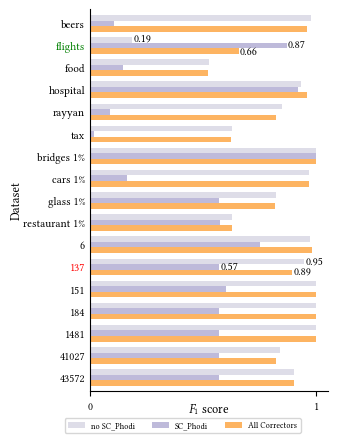

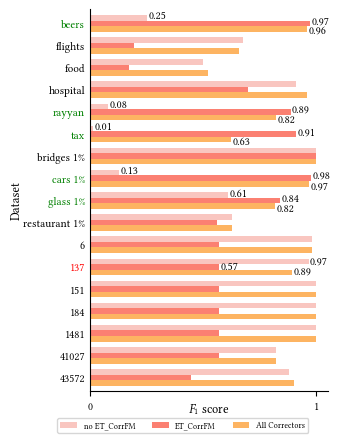

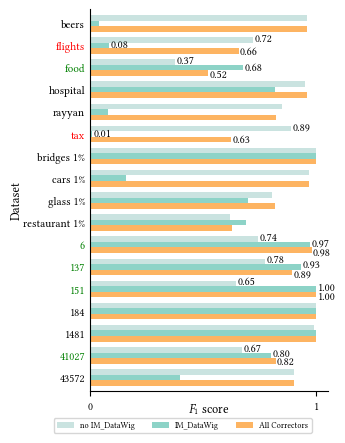

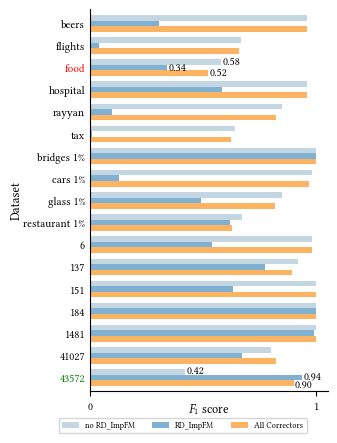

In [17]:
for corrector in ['SC_Phodi', 'ET_CorrFM', 'IM_DataWig', 'RD_ImpFM']:
    fig, ax, df = plots.plot_ablation('measurements/ablation-study/2024-04-27/', corrector)
    plt.savefig(f'./img/2024-07-15-ablation-study-{corrector}.pdf', bbox_inches='tight', pad_inches=0)

## ET_CorrFM vs Value Models

Loaded Mimir Results. 0/252 measurements failed.


/Users/philipp/code/mimir/notebook/plots.py:1136: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_yticklabels(custom_labels)


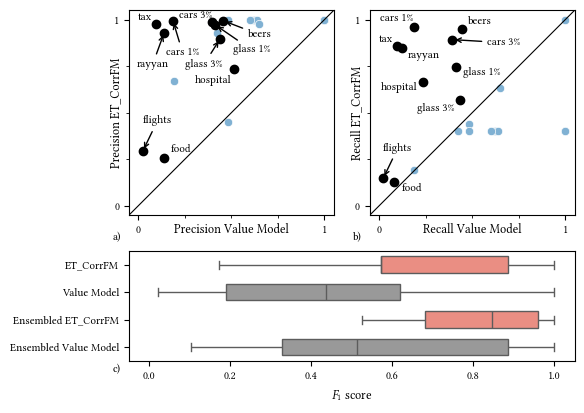

In [18]:
fig, axes, df_scatter = plots.et_corrfm_vs_value_model('measurements/corrfm-vs-value/2024-04-28/')
plt.savefig('./img/2024-04-28-scatter-et_corrfm-vs-value_model.pdf', bbox_inches='tight')

## Phodi vs Vicinity Models

Loaded Mimir Results. 0/219 measurements failed.


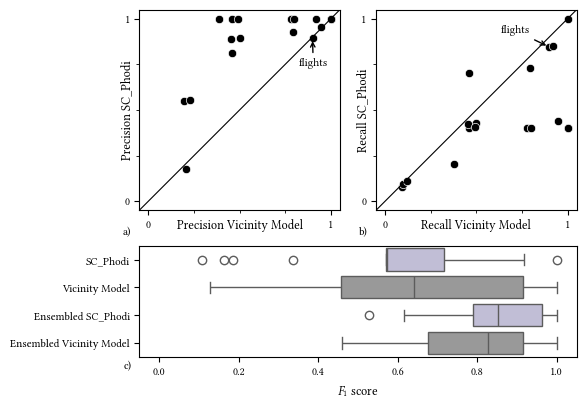

In [19]:
fig, axes, failed = plots.sc_phodi_vs_vicinity_model('measurements/phodi-vs-vicinity/2024-04-28-no-tax-food/')
plt.savefig('./img/2024-04-28-phodi-vs-vicinity.pdf', bbox_inches='tight')

## Runtime

Loaded Mimir Results. 0/63 measurements failed.
Loaded Mimir Results. 0/81 measurements failed.
Loaded Mimir Results. 0/120 measurements failed.


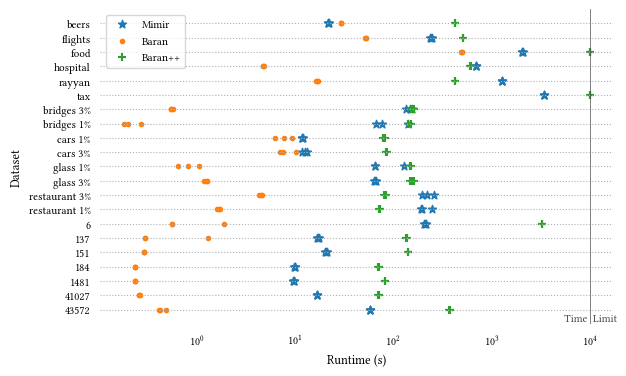

In [20]:
fig, ax = plots.plot_runtime('measurements/runtime/mimir-2024-04-28/', 'measurements/runtime/baran-2024-04-24/', 'measurements/runtime/2024-04-15-baranpp-new/', correct_timeouts=True)
plt.savefig('./img/2024-07-15-runtime.pdf', bbox_inches='tight')

In [21]:
res_mimir_runtime, failed_measurements = plots.get_mimir_result('measurements/runtime/mimir-2024-04-28/')
res_baran_runtime, failed_measurements = plots.get_mimir_result('measurements/runtime/baran-2024-04-24/')
res_baranpp_runtime, failed_measurements = plots.get_mimir_result('measurements/runtime/2024-04-15-baranpp-new/')
 
mimir_runtimes = [r['runtime'] for r in res_mimir_runtime]
baran_runtimes = [r['runtime'] for r in res_baran_runtime]
baranpp_runtimes = [r['runtime'] for r in res_baranpp_runtime]

Loaded Mimir Results. 0/63 measurements failed.
Loaded Mimir Results. 0/81 measurements failed.
Loaded Mimir Results. 0/120 measurements failed.


In [22]:
print(f'Mimir runtimes: {len(mimir_runtimes)}')
print(f'Baran runtimes: {len(baran_runtimes)}')
print(f'Baran++ runtimes: {len(baranpp_runtimes)}')

Mimir runtimes: 63
Baran runtimes: 60
Baran++ runtimes: 57


Mimir has a complete set of measurments. Baran runs out of memory on tax and is thus not measured. Baran++ exceeds the time limit on food and tax.

In [23]:
baranpp_runtimes = baranpp_runtimes + [1E4 for _ in range(6)]  # add time limit for the two failing datasets

In [24]:
# Calculate quantiles using numpy
quantiles_mimir = np.percentile(mimir_runtimes, [25, 50, 75])
quantiles_baran = np.percentile(baran_runtimes, [25, 50, 75])
quantiles_baranpp = np.percentile(baranpp_runtimes, [25, 50, 75])

print(f"Average Mimir {round(np.mean(mimir_runtimes), 2)} Baran {round(np.mean(baran_runtimes),2)} Baran++ {round(np.mean(baranpp_runtimes),2)}")
print(f"25th percentile (Q1) Mimir {round(quantiles_mimir[0], 2)}, Baran {round(quantiles_baran[0], 2)} Baran++ {round(np.mean(quantiles_baranpp[0]),2)}")
print(f"25th percentile (Q2/median) Mimir {round(quantiles_mimir[1],2)}, Baran {round(quantiles_baran[1],2)} Baran++ {round(np.mean(quantiles_baranpp[1]),2)}")
print(f"25th percentile (Q3) Mimir {round(quantiles_mimir[2],2)}, Baran {round(quantiles_baran[2],2)} Baran++ {round(np.mean(quantiles_baranpp[2]),2)}")

Average Mimir 425.78 Baran 31.41 Baran++ 1287.57
25th percentile (Q1) Mimir 16.97, Baran 0.29 Baran++ 82.11
25th percentile (Q2/median) Mimir 66.62, Baran 1.26 Baran++ 148.68
25th percentile (Q3) Mimir 240.1, Baran 7.55 Baran++ 428.45


## Datawig on `flights`
Datawig diminishes the correction quality when correcting the `flights` dataset.
We want to better understand what is happening.

In [25]:
flights = analysis.Analysis('flights_analysis.json')

In [26]:
flights.overview(7)

156/589 errors in column 7 (26.5%)


,column,cell,error,correction,correction_suggestion
0,7,"[433, 7]",02189,2189,2189
1,7,"[827, 7]",00930,930,"[1, '930']"
2,7,"[793, 7]",00917,917,"[1, '3917']"
3,7,"[651, 7]",03266,3266,"[1, '3266']"
4,7,"[495, 7]",02536,2536,"[1, '2536']"
5,7,"[782, 7]",03570,3570,"[1, '3570']"
6,7,"[590, 7]",08340,8340,no corrections suggested
7,7,"[359, 7]",03456,3456,no corrections suggested
8,7,"[825, 7]",06330,6330,"[1, '6330']"
9,7,"[223, 7]",03827,3827,"[1, '3827']"


In [27]:
flights.corrector('auto_instance', 11).iloc[0, -1]

{'0': 0.11763112992048264,
 '1.2099231': 0.04317062348127365,
 '2.1': 0.02518794871866703,
 '2.2773614': 0.0012256602058187127,
 '2.540909': 0.003818467492237687,
 '2.8421054': 0.02085459977388382,
 '3': 0.00979549903422594,
 '3.0217428': 0.0027797804214060307,
 '3.0249999': 0.011485479772090912,
 '3.0493855': 0.0011139666894450784,
 '3.07': 0.018897108733654022,
 '3.2428572': 0.024477994069457054,
 '3.4': 0.014088376425206661,
 '3.75': 0.011565939523279667,
 '3.9': 0.0016682909335941076,
 '3.9097095': 0.03167486935853958,
 '4.0695124': 0.002624242100864649,
 '4.127439': 0.15069526433944702,
 '4.243293': 0.00746635627001524,
 '4.265': 0.0078688133507967,
 '4.4': 0.020351404324173927,
 '4.475': 0.08943174034357071,
 '4.6': 0.04520341753959656,
 '4.63': 0.10970526933670044,
 '4.75': 0.0019998005591332912,
 '4.7976766': 0.003146504983305931,
 '4.957143': 0.026734251528978348,
 '4.9682083': 0.0038952245377004147,
 '5': 0.0010676725069060922,
 '5.35': 0.0014624757459387183,
 '5.410157': 0.0